In [49]:
# Validation

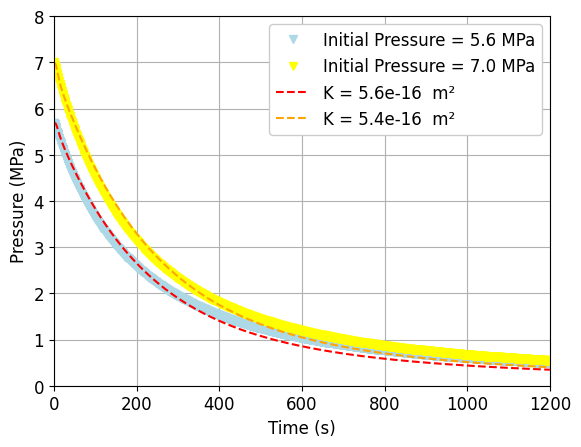

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

best_fit_800 = pd.read_csv('model_pellets_800.csv')
best_fit_1000 = pd.read_csv('model_pellets_1000.csv')
data20 = pd.read_csv('experimental_data.csv')


plt.plot(data20['Time4'], data20['P_4']/1e6, 'v', color='lightblue' , label = 'Initial Pressure = 5.6 MPa')
plt.plot(data20['Time3'], data20['P_3']/1e6, 'v', color='yellow' , label = 'Initial Pressure = 7.0 MPa')
plt.plot(best_fit_800['time'], best_fit_800['inlet-p']/1e6, linestyle = '--', color='red', label = 'K = 5.6e-16  m\u00B2 ')
plt.plot(best_fit_1000['time'], best_fit_1000['inlet-p']/1e6, linestyle = '--', color='orange', label = 'K = 5.4e-16  m\u00B2')
plt.xlabel('Time (s)', fontsize = 12)
plt.xlim(0,1200)
plt.ylim(0, 8) 
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12, framealpha = 1.0)
plt.grid() 

In [51]:
# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_rmse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

# Compute the error between the plot and experimental data
x_values = best_fit_1000['time']
y_values = best_fit_1000['inlet-p']
experimental_y_values = np.interp(x_values, data20['Time3'], data20['P_3'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
rmse = compute_rmse(y_values, experimental_y_values)/1e6

print(f"rmse_1000 = ", rmse, f"MPa")

# Compute the error between the plot and experimental data
x_values = best_fit_800['time']
y_values = best_fit_800['inlet-p']
experimental_y_values = np.interp(x_values, data20['Time4'], data20['P_4'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
rmse = compute_rmse(y_values, experimental_y_values)/1e6

print(f"rmse_800 = ", rmse, f"MPa")

rmse_1000 =  0.1408137209563947 MPa
rmse_800 =  0.1517465849601475 MPa
